# MALWARE DETECTION AND CLASSIFICATIONS 

## About The Dataset

The original source of the data is The Canadian Institute of Cybersecurity (CIC) 2022 editions. 

The dataset used in this project was downloaded from Kaggle at https://www.kaggle.com/datasets/luccagodoy/obfuscated-malware-memory-2022-cic and the source is https://www.unb.ca/cic/datasets/malmem-2022.html

Obfuscated malware is malware that hides to avoid detection and extermination. The obfuscated malware dataset is designed to test obfuscated malware detection methods through memory. The dataset was created to represent as close to a real-world situation as possible using malware that is prevalent in the real world. Made up of Spyware, Ransomware and Trojan Horse malware, it provides a balanced dataset that can be used to test obfuscated malware detection systems. 

## Import the Needed Libraries 

In [1]:
#import needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



### Import necessary Module from sci-kit Library

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## DATA COLLECTION

### Import the dataset

In [3]:
# Read in the data\n",

Mal = pd.read_csv('Obfuscated-MalMem2022.csv')

#Take a look at the data

Mal.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


### Explore the Dataset  

In [4]:
Mal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [5]:
Mal.shape # The size of the dataset

(58596, 57)

In [6]:
Mal.columns #display the columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [7]:
Mal.describe() # show the stastics

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [8]:
Mal.isnull().sum() #check for columns with missing value

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

There is no missing data, therefore there is no need for data cleaning. 

DATA COLLECTION

DATA PREPROCESSING


FEATURE SELECTION


MODEL SELECTION


TRAINING


EVALUATION


SELCTION OF BEST MODEL


## DATA PREPROCESSING

### Define the Independent variable and the Dependent variable

In [9]:
# Remove duplicates in the entire dataset first
Mal_clean = Mal.drop_duplicates()

# Define X and y
X = Mal_clean.drop(columns=['Class', 'Category'], axis=1) # all columns except target
y = Mal_clean['Class'] # target column

In [10]:
#### Check for Class balance

y.value_counts()

Class
Benign     29231
Malware    28831
Name: count, dtype: int64

The class is moderately slipted between the two class. 

# Slipt the Dataset into Train and Test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
# Check for correlation of target and features

# Convert y to numeric first
y_numeric = y.map({'Benign': 0, 'Malware': 1})

numeric_cols = X.select_dtypes(include=np.number).columns

corr_with_target = X[numeric_cols].apply(lambda col: col.corr(y_numeric))

print("\nCorrelation with target:")
print(corr_with_target)

C:\Users\Peter\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Peter\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Correlation with target:
pslist.nproc                             -0.198094
pslist.nppid                              0.429241
pslist.avg_threads                       -0.790867
pslist.nprocs64bit                             NaN
pslist.avg_handlers                      -0.332496
dlllist.ndlls                            -0.823303
dlllist.avg_dlls_per_proc                -0.908755
handles.nhandles                         -0.380508
handles.avg_handles_per_proc             -0.253620
handles.nport                                  NaN
handles.nfile                            -0.043446
handles.nevent                           -0.876403
handles.ndesktop                         -0.392127
handles.nkey                             -0.697192
handles.nthread                          -0.871985
handles.ndirectory                       -0.304027
handles.nsemaphore                       -0.768874
handles.ntimer                           -0.782949
handles.nsection                         -0.819854
handl

There is no correlated column, hence it would have been removed. 

In [13]:
### Define preprocessing transformers for numerical and categorical features

numeric_features = X_train.select_dtypes(include=['float64']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [14]:
### Define separate transformers for both feature types and combine them into a single preprocessing transformer

# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [15]:
#Combine the transformers into a single preprocessing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## MODEL TRAINING

### Model 1: Random Forest Classifier

In [16]:
#Create a pipeline by combining the preprocessing with a Random Forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [17]:
#Define a parameter grid to use in a cross validation grid search model optimizer

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [18]:
#Perform grid search cross-validation and fit the best model to the training data
#Select a cross-validation method, ensuring target stratification during validation

cv = StratifiedKFold(n_splits=5, shuffle=True)

## Instantiate and fit GridSearchCV to the pipeline

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)  
grid_search.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   6.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   6.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   5.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   6.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   6.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  12.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  12.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pslist.avg_threads',
                                                                          'pslist.avg_handlers',
                                                                          'dlllist.avg_dlls_per_proc',
                                                                          'handles.avg_handles_per_proc',
                                                                          'ldrmodules.not_in_load_avg',
                                                                          'ldrmodules.not_in_init_avg',
                                                                          'ldrmodules.not_in_mem_avg',
                                                                          'malfind.uniqueI...
                                                                          'psxview.not_in_session_false_avg',
                                                                          'psxview.not_in_deskthrd_false_avg']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [19]:
#Print the best parameters and best crossvalidation score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 1.00


In [20]:
#Display your model's estimated score

test_score = grid_search.score(X_test, y_test)  
print("Test set score: {:.2f}".format(test_score))

Test set score: 1.00


## MODEL EVALUATIONS

In [21]:
#Get the model predictions from the grid search estimator on the unseen data


y_pred = grid_search.predict(X_test)


#Print the classification report¶

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5847
     Malware       1.00      1.00      1.00      5766

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



### Interpretations

For the precisions, 
The Benign and the Malware is accurately predicted there is no False positive

For Recall,
No false negatives for either class. All The actual Benign and the Malware are adequtely predicted. 

The F1-score being 1.00 means perfect balance between precision and recall.
All 11720 samples were accurately classified.

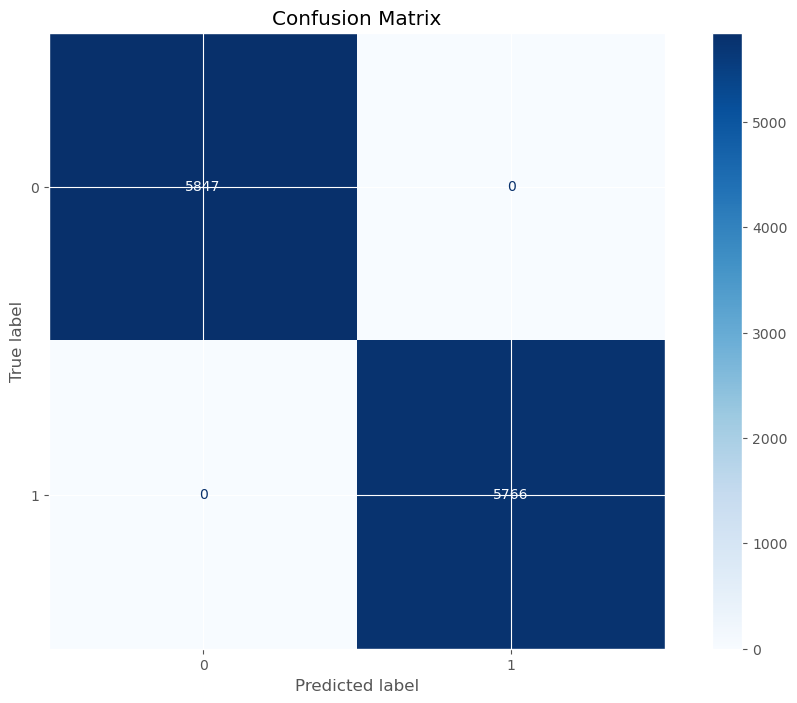

In [22]:
#Plot the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### Confusion Matrix 

True Positives (TP) – Model correctly identified 5766 Malwares. These are malware samples that were correctly predicted as malware. 
True Negatives (TN) – Model correctly identified 5847. These are benign samples correctly classified as benign. 
False Positives (FP) – Zero misclassifications 
False Negatives (FN) – Zero misclassifications 

### Check for Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

Cross-validation scores: [0.99888056 0.99956945 0.9961247  0.99956941 0.99965553]


Mean accuracy ≈ 0.9999 → ≈ 99.99%, almost perfect.

Standard deviation is very small (~0.0008) → performance is very consistent across folds.

This indicates the model generalizes very well on this dataset. Which implies that the model is highly accurate across different splits, the low variability shows it is stable and not sensitive to the way the data is split. Combined with your 100% test set accuracy, this suggests excellent model performance.

### FEATURE EXTRACTION

In [24]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

print(feature_importances)

[7.97224960e-02 2.29411281e-01 2.51888768e-01 2.01100804e-01
 6.92895126e-02 1.46408157e-02 8.09696624e-02 4.16418721e-02
 7.66146654e-04 8.14469017e-06 3.58319913e-03 6.42400159e-04
 5.55822301e-03 3.87360834e-03 1.69030668e-02]


# Combine numeric and categorical feature names
feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

N = 20  # Change this number to display more or fewer features
top_features = importance_df.head(N)

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

## MODEL TRAINING

### Model 2: LogisticRegression 

In [27]:
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier =LogisticRegression(random_state=42)) 

# update the model's estimator to use the new pipeline
grid_search.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

grid_search.param_grid = param_grid

# Fit the updated pipeline with LogisticRegression
grid_search.fit(X, y)

# Make predictions
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   3.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=  16.4s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   7.5s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=  17.5s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=  12.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   1.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   1.3s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   1.3s
[CV] END classifier__class_weight=No

## MODEL EVALUATION

#### Classificatication and confusion matrix of model 2

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      5847
     Malware       0.99      0.99      0.99      5766

    accuracy                           0.99     11613
   macro avg       0.99      0.99      0.99     11613
weighted avg       0.99      0.99      0.99     11613



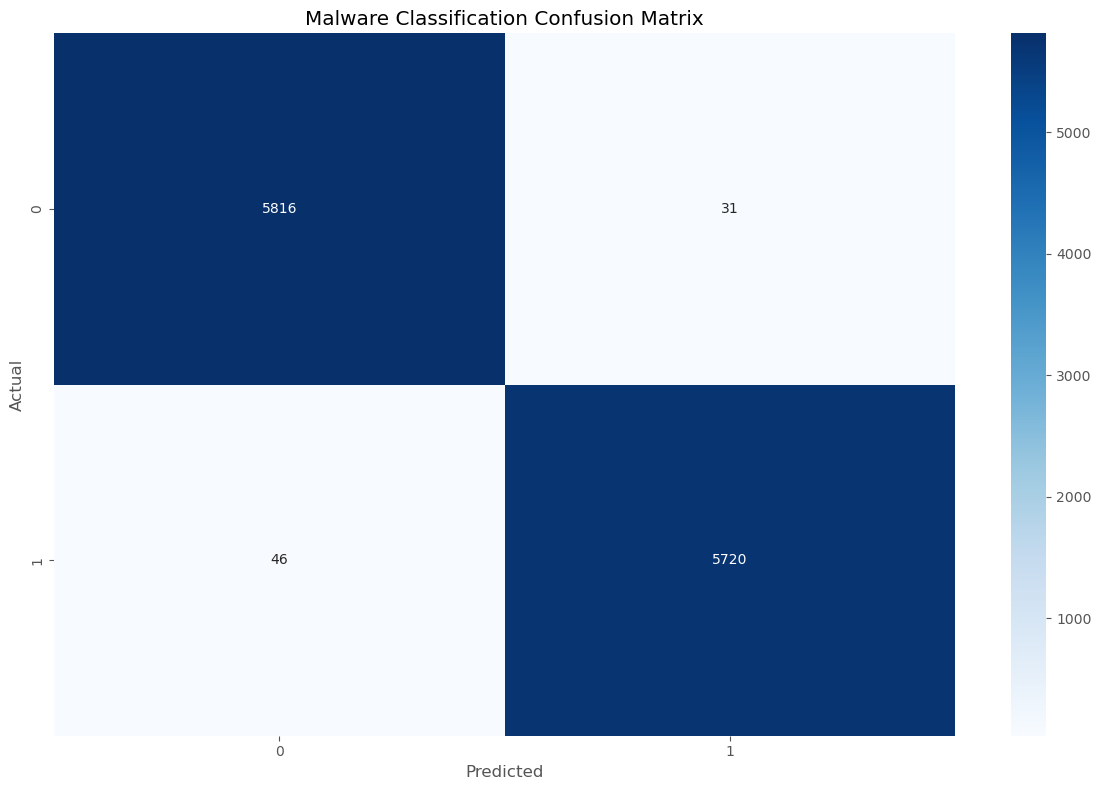

In [29]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Malware Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### Interpretation

For the precisions, The model predicts Benign and malware correctly 99% of the time.

For Recall, the model identifies correctly 99% of the actual Benign and the actual malwares. 

The F1-score of 0.99 indicates that perfect balance between precision and Recall. 

The model accuracy is 99%, it correctly classifies the all the samples. 

##### Confusion Matrix

True Positives (TP) – Malware correctly identified 5720 These are malware samples that were correctly predicted as malware.
True Negatives (TN) – Benign correctly identified 5816 These are benign files correctly classified as benign.
False Positives (FP) – Benign misclassified as Malware 31 These represent "false alarms." The model mistakenly flags 31 benign files as malware.
False Negatives (FN) – Malware missed 46 These are malware samples that the model failed to detect and classified as benign.